# LAPTOP PRICE PREDICTION USING XGBOOST REGRESSOR

The objective of this project is to develop a predictive model to estimate laptop prices based on various hardware and brand features using the XGBoost Regressor algorithm. The dataset contains information about laptop specifications such as brand,model,type,screen resolution,CPU,GPU,RAM,Storage,Operating system, and weight. By analyzing these features,the project aims to create a model that accurately predicts laptop prices,providing valuable insights for consumers and retailers in electronics market.

#### Importing Dataset and libraries

In [39]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics
df=pd.read_csv(r"E:\data_analytics\ml_works\machine_learning_projects\laptop_price - dataset.csv")
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


#### Information about data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

#### Finding and Removing null values

In [41]:
#removing null values
df.isna().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

#### Removing space in column name

In [42]:
#replacing space
df.columns=df.columns.str.replace(" ","")
print(df.columns)

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency(GHz)', 'RAM(GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight(kg)', 'Price(Euro)'],
      dtype='object')


#### Removing Duplicates

In [43]:
#remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

#### Encoding categorical values

In [44]:
#converting categorical data in to numerical data
le=LabelEncoder()
column_to_convert=['Company','Product','TypeName','ScreenResolution','CPU_Company','CPU_Type','Memory','GPU_Company','GPU_Type','OpSys']
for col in column_to_convert:
    df[col]=le.fit_transform(df[col])
df.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency(GHz),RAM(GB),Memory,GPU_Company,GPU_Type,OpSys,Weight(kg),Price(Euro)
0,1,300,4,13.3,23,1,40,2.3,8,4,2,56,8,1.37,1339.69
1,1,301,4,13.3,1,1,40,1.8,8,2,2,50,8,1.34,898.94
2,7,50,3,15.6,8,1,46,2.5,8,16,2,52,4,1.86,575.00
3,1,300,4,15.4,25,1,54,2.7,16,29,0,76,8,1.83,2537.45
4,1,300,4,13.3,23,1,40,3.1,8,16,2,57,8,1.37,1803.60
5,0,58,3,15.6,0,0,11,3.0,4,26,0,84,5,2.10,400.00
6,1,300,4,15.4,25,1,54,2.2,16,15,2,58,3,2.04,2139.97
7,1,301,4,13.3,1,1,40,1.8,8,15,2,50,8,1.34,1158.70
8,2,608,4,14.0,8,1,70,1.8,16,29,3,37,5,1.30,1495.00
9,0,430,4,14.0,15,1,53,1.6,8,16,2,105,5,1.60,770.00


#### Finding Correlation

In [45]:
df.corr(numeric_only=True)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency(GHz),RAM(GB),Memory,GPU_Company,GPU_Type,OpSys,Weight(kg),Price(Euro)
Company,1.000000,0.069802,0.001678,-0.082380,0.086479,0.047634,-0.004720,0.133191,0.041771,0.057219,0.059911,-0.064761,0.127853,-0.128194,0.136541
Product,0.069802,1.000000,0.076330,-0.213195,0.173117,0.198192,0.115076,-0.043060,0.018830,0.082782,0.097287,0.063803,0.114857,-0.244554,0.142888
TypeName,0.001678,0.076330,1.000000,-0.086162,-0.171231,-0.048875,-0.127242,-0.082810,-0.242265,0.016451,-0.220459,0.215271,0.090069,-0.275440,-0.125648
Inches,-0.082380,-0.213195,-0.086162,1.000000,-0.249594,-0.134922,0.195321,0.305037,0.241078,-0.188753,0.094111,-0.209858,0.039672,0.826638,0.066608
ScreenResolution,0.086479,0.173117,-0.171231,-0.249594,1.000000,0.134512,0.174664,0.055375,0.227288,0.068113,0.122643,-0.022656,0.063497,-0.134829,0.322761
CPU_Company,0.047634,0.198192,-0.048875,-0.134922,0.134512,1.000000,0.327164,-0.137123,0.102239,-0.000449,0.480535,-0.308513,-0.049561,-0.067674,0.177881
CPU_Type,-0.004720,0.115076,-0.127242,0.195321,0.174664,0.327164,1.000000,0.219135,0.436243,0.027676,0.296056,-0.116222,0.123982,0.222328,0.473860
CPU_Frequency(GHz),0.133191,-0.043060,-0.082810,0.305037,0.055375,-0.137123,0.219135,1.000000,0.366254,-0.068223,0.169774,-0.225074,0.219762,0.318649,0.428847
RAM(GB),0.041771,0.018830,-0.242265,0.241078,0.227288,0.102239,0.436243,0.366254,1.000000,0.161390,0.280375,-0.185136,0.140002,0.389370,0.740287
Memory,0.057219,0.082782,0.016451,-0.188753,0.068113,-0.000449,0.027676,-0.068223,0.161390,1.000000,0.006993,0.056919,0.037335,-0.162079,0.198114


#### Scatter plot

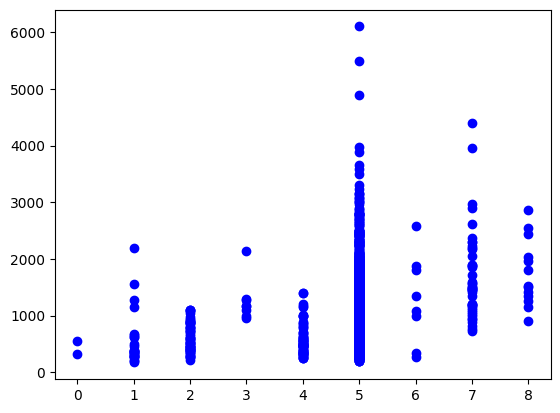

In [46]:
#Plotting
plt.scatter(df['OpSys'],df['Price(Euro)'],color='blue')
plt.show()

#### Dependant and Independent Variables

In [47]:
x=df.iloc[:,0:13].values
x=pd.DataFrame(x)
print(x)
y=df.iloc[:,14].values
y=pd.DataFrame(y)
print(y)

        0      1    2     3     4    5     6    7     8     9    10    11   12
0      1.0  300.0  4.0  13.3  23.0  1.0  40.0  2.3   8.0   4.0  2.0  56.0  8.0
1      1.0  301.0  4.0  13.3   1.0  1.0  40.0  1.8   8.0   2.0  2.0  50.0  8.0
2      7.0   50.0  3.0  15.6   8.0  1.0  46.0  2.5   8.0  16.0  2.0  52.0  4.0
3      1.0  300.0  4.0  15.4  25.0  1.0  54.0  2.7  16.0  29.0  0.0  76.0  8.0
4      1.0  300.0  4.0  13.3  23.0  1.0  40.0  3.1   8.0  16.0  2.0  57.0  8.0
...    ...    ...  ...   ...   ...  ...   ...  ...   ...   ...  ...   ...  ...
1270  10.0  580.0  0.0  14.0  13.0  1.0  55.0  2.5   4.0   4.0  2.0  46.0  5.0
1271  10.0  588.0  0.0  13.3  19.0  1.0  55.0  2.5  16.0  29.0  2.0  46.0  5.0
1272  10.0  196.0  3.0  14.0   0.0  1.0  20.0  1.6   2.0  35.0  2.0  39.0  5.0
1273   7.0    2.0  3.0  15.6   0.0  1.0  55.0  2.5   6.0  10.0  0.0  88.0  5.0
1274   2.0  568.0  3.0  15.6   0.0  1.0  20.0  1.6   4.0  26.0  2.0  39.0  5.0

[1275 rows x 13 columns]
            0
0     1339.6

#### Splitting variables in to test and train

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Feature Scaling

In [49]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)


#### Model Fitting

In [50]:
model = XGBRegressor() 
model.fit(x_train, y_train) 


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Model Predictions

In [51]:
y_pred=model.predict(x_test)
print(y_test)
print(y_pred)

           0
1179   650.0
342    716.0
649   1584.0
772   1020.0
803   1749.0
...      ...
701    399.0
1105  1413.1
424   2799.0
944   1299.0
65    1983.0

[255 rows x 1 columns]
[ 731.39343  767.1239  1622.4542  1038.2156  1649.5367   782.90576
 1018.52954  335.26242 2243.4104   536.9122   557.1659   859.4714
  941.80273 1939.2799  2163.9678   570.5514  1394.5989  1142.045
 2177.4856  2613.0176   559.3459   325.76562 1454.2329  1661.7026
  814.04846 2283.2998   987.2782   760.1379   535.04443 1027.5
 1521.3595   570.124    724.94696  324.84857  663.9641   935.6665
 1122.1498   560.3685  1048.9447  1147.0172  1315.9003   361.11383
 1401.8538  1210.8708   936.5733  1182.3297  1659.7449   891.5879
 2114.507    793.47864  933.8894   244.53946 2411.2197   304.34296
  609.4966  1853.3496   979.19635 1509.113   1305.2844   623.53394
 1067.7582   687.166   1814.8943   455.16483  886.3058   536.16144
  546.10034  941.8621   158.7816   576.63806 1155.5062   891.1603
 1680.6628  1491.2162   975

#### Evaluating Model Performance

In [52]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 149.1930389404297
mean squared error: 49850.04296875
root mean squared error: 223.27123184313288


#### Prediction Score

In [53]:
score = model.score(x_test, y_test) 
print(score*100,"%")

89.95646238327026 %


The XGBoost Regressor model achieved an impressive prediction accuracy of 89.95%, indicating a strong performance in predicting laptop prices based on the provided features. The error metrics further reinforce the model's accuracy:

Mean Absolute Error (MAE): 149.19,
Mean Squared Error (MSE): 49850.04,
Root Mean Squared Error (RMSE): 223.27

The low MAE and RMSE values suggest that the model's predictions are closely aligned with actual prices. This robust model can be utilized for practical applications such as price estimation, assisting consumers in decision-making, and helping retailers optimize pricing strategies. Further fine-tuning and hyperparameter optimization could push the model's performance even higher.